[View in Colaboratory](https://colab.research.google.com/github/nomcomm/CamCanSuspenseISC_JMP/blob/master/scripts/Schmaelzle_JMP_01_CRMAnalysis.ipynb)

## ISC CamCan Suspense

To annotate suspense, we used an online rating tool (cite) and collected ratings of suspense while participants viewed the movie. The code below reads the continuous response measurements in, averages them across viewers, and downsamples them to match the resolution of the fMRI.

### setting up modules

In [1]:
import os, sys, scipy, warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

%matplotlib inline
warnings.filterwarnings("ignore")

### set up files

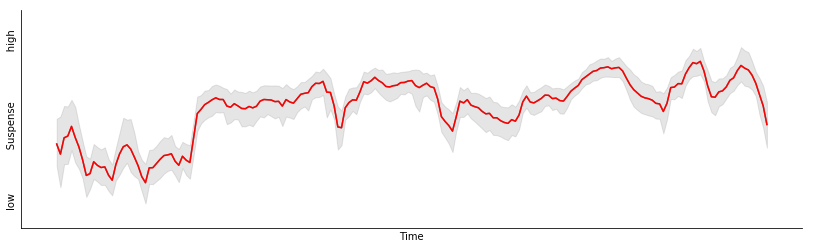

In [2]:
suspense_raw = '../data/suspense.npy'

all_suspense = np.load(suspense_raw)
all_suspense = all_suspense[:,50:2440] 
# note: we cut of a tiny bit at the beginning and end to make the data match and correct for hrf-delay

d = []
for f in range (all_suspense.shape[0]):
    # note: we downsample to 163 because for the sliding-ISC this will be the resolution we get
    d.append(scipy.signal.resample(scipy.stats.zscore(all_suspense[f,:]), 193))
stacked_suspense = np.asarray(d)


d = np.hstack(stacked_suspense)
h = np.hstack([np.arange(193)] * 22)
dh = np.vstack((d,h)).T
df_dh = pd.DataFrame(data =  dh, columns = ['a','b'])


f = plt.figure(figsize=(14,4));
sns.lineplot(x="b", 
             y="a", 
             color = 'gray',
             data=df_dh);
plt.plot(np.mean(stacked_suspense, axis = 0), color ='red');
plt.ylabel('low              Suspense                high');
plt.xlabel('Time');
plt.ylim(-2.5,2);
plt.xticks([]);
plt.yticks([]);
sns.despine();


In [3]:
avg_suspense = np.mean(stacked_suspense, axis = 0)
np.save('../data/avg_suspense.npy', avg_suspense)

0.9314723991687607

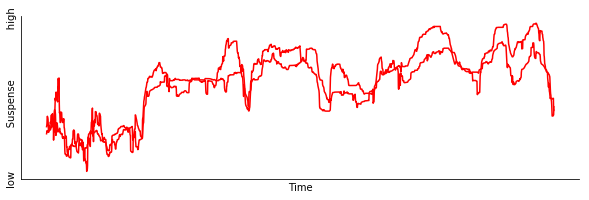

In [4]:
all_s1 = np.mean(all_suspense[:11, :], axis = 0)
all_s2 = np.mean(all_suspense[11:, :], axis = 0)

f = plt.figure(figsize=(10,3));
plt.plot(all_s1, color = 'r')
plt.plot(all_s2, color = 'r')
plt.ylabel('low              Suspense                high');
plt.xlabel('Time');
plt.xticks([]);
plt.yticks([]);
sns.despine()

np.corrcoef(all_s1, all_s2)[0,1]